In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout 

In [3]:
# read emoticon dataset
train_emoticon_df = pd.read_csv("../datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_X = [list(datapoint) for datapoint in train_emoticon_X]
train_emoticon_Y = train_emoticon_df['label'].tolist()

# read emoticon validation-set
test_emoticon_df = pd.read_csv("../datasets/valid/valid_emoticon.csv")
test_emoticon_X = test_emoticon_df['input_emoticon'].tolist()
test_emoticon_X = [list(datapoint) for datapoint in test_emoticon_X]
test_emoticon_Y = test_emoticon_df['label'].tolist()

training_data_count = len(train_emoticon_X)
validation_data_count = len(test_emoticon_X)

In [4]:
print(train_emoticon_X[:5])

[['😛', '🛐', '😻', '😑', '😣', '🙠', '🙯', '🚼', '😒', '🙼', '😑', '🙯', '😣'], ['🛐', '😑', '😪', '😛', '🚼', '🙯', '😣', '🚅', '😑', '🙯', '😹', '😣', '🙼'], ['😛', '🙯', '😑', '🚡', '😣', '🚼', '🛐', '🙲', '😣', '🙯', '🛑', '😑', '🙼'], ['😛', '🚼', '🛐', '🙐', '😣', '🙯', '😑', '🙪', '😑', '🙼', '🛆', '😣', '🙯'], ['🛐', '🚟', '🚼', '😛', '🙋', '😑', '😣', '🙯', '😹', '🙯', '😑', '😣', '🙼']]


In [5]:
emozi_set = set()
for datapoint in train_emoticon_X:
    for emozi in datapoint:
        emozi_set.add(emozi)
emozi_list = list(emozi_set)

In [7]:
le = LabelEncoder()
le.fit(emozi_list)

LabelEncoder()

In [8]:
X_train = np.array([le.transform(datapoint) for datapoint in train_emoticon_X])
y_train = np.array(train_emoticon_Y)
X_test = np.array([le.transform(datapoint) for datapoint in test_emoticon_X])
y_test = np.array(test_emoticon_Y)

In [9]:
print(X_test[:5])
print(X_train[:5])
print(y_train[:5])
print(y_test[:5])

[[179  26  19  16  34 147 106 198 117  16  34 106 134]
 [198  34  85  26 114 106  16 179  16 106  34 117   8]
 [179 198 162  26 106 125  34  16  55 106  16 117  34]
 [ 26  32  16 116  34 106 179 198  34  17 106 117  16]
 [100  16  50  26  34 198 179 106  25  34 117  16 106]]
[[ 26 198  58  16  34  93 106 179  17 117  16 106  34]
 [198  16  41  26 179 106  34 126  16 106  56  34 117]
 [ 26 106  16 154  34 179 198 109  34 106 199  16 117]
 [ 26 179 198  78  34 106  16 102  16 117 188  34 106]
 [198 152 179  26  73  16  34 106  56 106  16  34 117]]
[0 0 0 1 1]
[1 1 0 0 1]


In [92]:
model  =  Sequential()
model.add(Embedding(input_dim=214, output_dim=512, input_length=13))  # input_dim=214 unique symbols, output_dim=64-dim embeddings
model.add(LSTM(64, return_sequences=False))  # LSTM with 64 units
model.add(Dropout(0.3))
# model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train, 
          epochs = 10, 
          verbose = 1, 
          validation_data = (X_test, y_test), 
          shuffle = True, 
          validation_freq = 1
)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6569 - loss: 0.5828 - val_accuracy: 0.8957 - val_loss: 0.2517
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9051 - loss: 0.2179 - val_accuracy: 0.9284 - val_loss: 0.1571
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9378 - loss: 0.1500 - val_accuracy: 0.9305 - val_loss: 0.1239
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9554 - loss: 0.1168 - val_accuracy: 0.9632 - val_loss: 0.0919
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9626 - loss: 0.0942 - val_accuracy: 0.9550 - val_loss: 0.0907
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9727 - loss: 0.0726 - val_accuracy: 0.9591 - val_loss: 0.0912
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9808 - loss: 0.0517 - val_accuracy: 0.9509 - val_loss: 0.0999
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9827 - loss: 0.0488 - val_accu

In [10]:
# feature extraction

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print(type(le_name_mapping))

{'😀': 0, '😁': 1, '😂': 2, '😃': 3, '😄': 4, '😅': 5, '😆': 6, '😇': 7, '😉': 8, '😊': 9, '😋': 10, '😌': 11, '😍': 12, '😎': 13, '😏': 14, '😐': 15, '😑': 16, '😒': 17, '😓': 18, '😔': 19, '😕': 20, '😖': 21, '😗': 22, '😘': 23, '😙': 24, '😚': 25, '😛': 26, '😜': 27, '😝': 28, '😞': 29, '😟': 30, '😠': 31, '😡': 32, '😢': 33, '😣': 34, '😤': 35, '😥': 36, '😦': 37, '😧': 38, '😨': 39, '😩': 40, '😪': 41, '😫': 42, '😬': 43, '😭': 44, '😮': 45, '😯': 46, '😰': 47, '😱': 48, '😲': 49, '😳': 50, '😴': 51, '😵': 52, '😶': 53, '😷': 54, '😸': 55, '😹': 56, '😺': 57, '😻': 58, '😼': 59, '😽': 60, '😾': 61, '😿': 62, '🙀': 63, '🙁': 64, '🙃': 65, '🙄': 66, '🙅': 67, '🙆': 68, '🙇': 69, '🙈': 70, '🙉': 71, '🙊': 72, '🙋': 73, '🙌': 74, '🙍': 75, '🙎': 76, '🙏': 77, '🙐': 78, '🙑': 79, '🙒': 80, '🙓': 81, '🙔': 82, '🙕': 83, '🙖': 84, '🙗': 85, '🙘': 86, '🙙': 87, '🙚': 88, '🙛': 89, '🙜': 90, '🙞': 91, '🙟': 92, '🙠': 93, '🙢': 94, '🙣': 95, '🙤': 96, '🙥': 97, '🙦': 98, '🙧': 99, '🙨': 100, '🙩': 101, '🙪': 102, '🙫': 103, '🙬': 104, '🙮': 105, '🙯': 106, '🙰': 107, '🙱': 108, '🙲': 109, '🙳': 110,

In [111]:
embeddings = model.layers[0].get_weights()[0]
print(type(embeddings[0]))

<class 'numpy.ndarray'>


In [102]:
embedding_dict = dict()
for emozi in le_name_mapping:
    embedding_dict[emozi] = embeddings[le_name_mapping[emozi]]

print(embedding_dict)

{'😀': array([ 2.70262379e-02, -7.65894279e-02,  7.96786249e-02, -1.00294743e-02,
       -2.97275528e-05, -5.94073981e-02, -8.05490837e-02, -5.75158559e-02,
        1.05985217e-02, -1.34303570e-02,  3.08590680e-02, -3.18530798e-02,
        1.96363796e-02, -6.88769072e-02,  2.00730190e-02, -5.30857258e-02,
        6.00830428e-02, -2.01711524e-02,  1.38762211e-02, -4.76345606e-02,
       -3.30464193e-03,  1.02148214e-02,  4.70671393e-02, -4.61125411e-02,
        6.73122033e-02, -4.80824634e-02,  8.43901932e-02,  2.89370287e-02,
       -1.00082476e-02, -8.10735077e-02,  4.01422903e-02, -2.69750077e-02,
       -3.35509493e-03, -1.21717021e-01, -2.24544760e-02,  4.32353690e-02,
       -6.02315590e-02, -1.71306506e-02, -1.96984243e-02,  2.53668595e-02,
        3.27188261e-02, -6.99748546e-02, -5.86887412e-02, -9.94451344e-02,
       -1.72760878e-02, -1.02403741e-02, -9.02917993e-04,  1.49552962e-02,
        5.68112321e-02, -1.39719490e-02,  6.25311434e-02, -8.77705123e-03,
       -3.46386880e

In [132]:
transformed_X = []
test_trans_X = []

for string in train_emoticon_X:
    features = []
    for emozi in string:
        encoding = embedding_dict[emozi]
        features.append(encoding)
    features = np.array(features)
    transformed_X.append(features)
transformed_X = np.array(transformed_X)

for string in test_emoticon_X:
    features = []
    for emozi in string:
        encoding = embedding_dict[emozi]
        features.append(encoding)
    features = np.array(features)
    test_trans_X.append(features)
test_trans_X = np.array(test_trans_X)


In [135]:
# flattening each 13x512 feature matrix
flattened_transformed_X = []
for f_matrix in transformed_X:
    ff_matrix = f_matrix.flatten()
    flattened_transformed_X.append(ff_matrix)

flattened_Test_X = []
for f_matrix in test_trans_X:
    ff_matrix = f_matrix.flatten()
    flattened_Test_X.append(ff_matrix)

In [136]:
print(len(flattened_Test_X[0]))

6656


In [124]:
pca = PCA(n_components=100)
pca.fit(flattened_transformed_X)

PCA(n_components=100)

In [137]:
X_reduced = pca.transform(flattened_transformed_X)
X_test_red = pca.transform(flattened_Test_X)

In [131]:
lr = LogisticRegression(n_jobs=-1, max_iter=100)
lr.fit(X_reduced,y_train)

LogisticRegression(n_jobs=-1)

In [138]:
lr.score(X_test_red, y_test)

0.950920245398773

In [11]:
model2 = Sequential()
model2.add(Embedding(input_dim=214, output_dim=16, input_length=13)) # input_dim=214 unique symbols, output_dim=16-dim embeddings
model2.add(GRU(16))
model2.add(Dropout(0.3))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\rajud\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model2.fit(X_train, y_train, 
          epochs = 5, 
          verbose = 1, 
          validation_data = (X_test, y_test), 
          shuffle = True, 
          validation_freq = 1
)

Epoch 1/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5373 - loss: 0.6901 - val_accuracy: 0.7485 - val_loss: 0.5160
Epoch 2/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.3817 - val_accuracy: 0.8957 - val_loss: 0.2370
Epoch 3/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.2451 - val_accuracy: 0.8937 - val_loss: 0.2511
Epoch 4/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9072 - loss: 0.2174 - val_accuracy: 0.8712 - val_loss: 0.3007
Epoch 5/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9001 - loss: 0.2340 - val_accuracy: 0.9141 - val_loss: 0.2183


In [13]:
toppers = []
for i in range(13):
    pos_count = dict()
    for emozi in emozi_list:
        pos_count[emozi] = 0

    for datapoint in train_emoticon_X:
        pos_count[datapoint[i]]+=1

    pos_count = sorted(pos_count.items(), key=lambda kv: 
                    (kv[1], kv[0]), reverse=True)
    
    toppers_ = []
    for (key, value) in pos_count:
        if value > 30:
            toppers_.append(key)
    
    toppers.append(toppers_)
    # print('i = ', i, pos_count)
    print('i = ', i, toppers_)
    print()

i =  0 ['😑', '😛', '😣', '🛐', '🙯', '🚼']

i =  1 ['😛', '😑', '😣', '🛐', '🚼', '🙯']

i =  2 ['😛', '🚼', '🛐', '😣', '🙯', '😑']

i =  3 ['😑', '🙯', '😣', '🚼', '🛐', '😛']

i =  4 ['🛐', '😣', '🚼', '🙯', '😑', '😛']

i =  5 ['🚼', '😣', '🙯', '🛐', '😛', '😑']

i =  6 ['🚼', '😣', '🙯', '😛', '🛐', '😑']

i =  7 ['🛐', '🙯', '🚼', '😑', '😣', '😛']

i =  8 ['😑', '😣', '🙯', '🙼']

i =  9 ['😣', '🙼', '🙯', '😑']

i =  10 ['🙯', '🙼', '😣', '😑']

i =  11 ['🙼', '🙯', '😑', '😣']

i =  12 ['😑', '🙼', '😣', '🙯']



In [14]:
most_freq_emozis = set()
for datapoint in toppers:
    for emozi in datapoint:
        most_freq_emozis.add(emozi)
most_freq_emozis = list(most_freq_emozis)

In [15]:
print(most_freq_emozis)

['😛', '🙯', '😣', '🛐', '🚼', '😑', '🙼']


In [16]:
arr = []
count = dict()
for emozi in emozi_list:
    for datapoint in train_emoticon_X:
        for x in datapoint:
            if(x == emozi):
                count[emozi] = count[emozi]+1 if emozi in count else 1

print(sorted(count.items(), key=lambda kv:
            (kv[1],kv[0]), reverse=True))

[('🙯', 14160), ('😣', 14160), ('😑', 14160), ('🛐', 7080), ('🚼', 7080), ('🙼', 7080), ('😛', 7080), ('🛆', 169), ('🛌', 168), ('🙮', 168), ('😶', 168), ('😩', 168), ('🛇', 167), ('🚽', 167), ('🚠', 167), ('🚇', 167), ('😡', 167), ('🛏', 166), ('🛀', 166), ('🚾', 166), ('🙨', 166), ('😢', 166), ('😒', 166), ('🛟', 165), ('🚯', 165), ('🚣', 165), ('🚝', 165), ('🚜', 165), ('🙬', 165), ('🙛', 165), ('😥', 165), ('\U0001f6d9', 164), ('🛑', 164), ('🛂', 164), ('🚁', 164), ('🙽', 164), ('🙫', 164), ('🙒', 164), ('🙏', 164), ('😻', 164), ('😬', 164), ('😪', 164), ('😔', 164), ('😍', 164), ('😉', 164), ('🛍', 163), ('🚿', 163), ('🚡', 163), ('🚏', 163), ('🚃', 163), ('🙸', 163), ('🙩', 163), ('🙊', 163), ('😊', 163), ('😇', 163), ('😁', 163), ('🛄', 162), ('🚷', 162), ('🚰', 162), ('🚦', 162), ('🙢', 162), ('🙄', 162), ('😿', 162), ('😴', 162), ('😮', 162), ('😕', 162), ('🙕', 161), ('🙎', 161), ('😹', 161), ('😱', 161), ('😦', 161), ('😓', 161), ('😋', 161), ('🛡', 160), ('🛓', 160), ('🚍', 160), ('🚌', 160), ('🙟', 160), ('🙅', 160), ('😆', 160), ('😅', 160), ('\U0001

In [19]:
train_emoticon_x_reduced = []
test_emoticon_x_reduced = []

for datapoint in train_emoticon_X:
    new_data = []
    for emozi in datapoint:
        if emozi in most_freq_emozis:
            # new_data.append('❌')
            continue
        else:
            new_data.append(emozi)
    train_emoticon_x_reduced.append(new_data)

for datapoint in test_emoticon_X:
    new_data = []
    for emozi in datapoint:
        if emozi in most_freq_emozis:
            # new_data.append('❌')
            continue
        else:
            new_data.append(emozi)
    test_emoticon_x_reduced.append(new_data)

In [20]:
print(train_emoticon_x_reduced[:5])
print(test_emoticon_x_reduced[:5])

[['😻', '🙠', '😒'], ['😪', '🚅', '😹'], ['🚡', '🙲', '🛑'], ['🙐', '🙪', '🛆'], ['🚟', '🙋', '😹']]
[['😔', '🚚', '🚍'], ['🙗', '🙸', '😉'], ['🚩', '🚄', '😸'], ['😡', '🙻', '😒'], ['🙨', '😳', '😚']]


In [22]:
infrequent_emozi = []
for emozi in emozi_list:
    if emozi not in most_freq_emozis:
        infrequent_emozi.append(emozi)
le2 = LabelEncoder()
le2.fit(infrequent_emozi)

LabelEncoder()

In [23]:
X_train_red = np.array([le2.transform(datapoint) for datapoint in train_emoticon_x_reduced])
X_test_red = np.array([le2.transform(datapoint) for datapoint in test_emoticon_x_reduced])

In [35]:
model3 = Sequential()
model3.add(Embedding(input_dim=len(infrequent_emozi), output_dim=16, input_length=13)) # input_dim=207 unique symbols, output_dim=16-dim embeddings
model3.add(GRU(32))
model3.add(Dropout(0.3))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\rajud\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

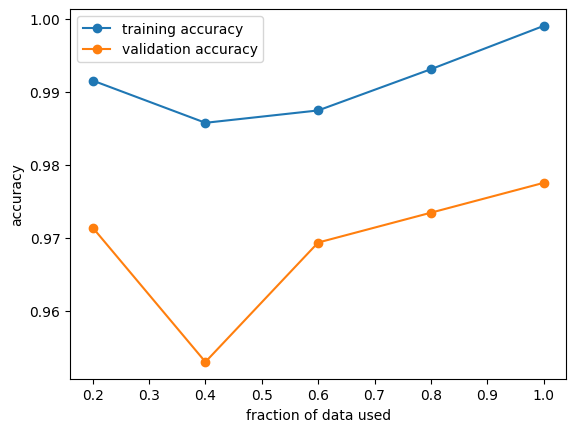

In [38]:
frac = []
t_acc = []
v_acc = []

for i in np.arange(0.2,1.1,0.2):
    model3.fit(X_train_red[:int(i*training_data_count)], y_train[:int(i*training_data_count)], 
          epochs = 20, 
          verbose = 0, 
          validation_data = (X_test_red, y_test), 
          shuffle = True, 
          validation_freq = 1
    )
    frac.append(i)
    # predictions = model3.predict(X_test_red)
    # predicted_labels = (predictions > 0.5).astype("int32")
    t_loss, t_accuracy = model3.evaluate(X_train_red, y_train, verbose=0)
    v_loss, v_accuracy = model3.evaluate(X_test_red, y_test, verbose=0)
    t_acc.append(t_accuracy)
    v_acc.append(v_accuracy)

plt.plot(frac,t_acc, marker='o', label='training accuracy')
plt.plot(frac, v_acc, marker='o', label='validation accuracy')
plt.legend()
plt.xlabel("fraction of data used")
plt.ylabel("accuracy")
plt.show
